Řešení Poissonovy rovnice metodou konečných diferencí (metodou sítí)
==============================================================

### Definice úlohy

Chceme vyřešit 2D Poissonovu rovnici
$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \rho
$$
na obdélníkové oblasti
$$
\Omega = \left<0, x_{\rm max}\right> \times \left<0, y_{\rm max}\right>
$$
s Dirichletovou okrajovou podmínkou
$$
u(x, y) = u_0(x, y);\quad (x,y)\in \partial\Omega.
$$
Pozn.: faktor $-1/\epsilon_0$ z Poissonovy rovnice v elektrostatice zde pro jednoduchost a bez újmy na obecnosti vynecháváme.

### Diskretizace
Provedeme následovnou diskretizaci prostorových souřadnic:
$$
x_i = hi;\quad i = 0,\ldots,M+1;\quad hM = x_{\rm max},
$$
$$
y_j = hj;\quad j = 0,\ldots,N+1;\quad hN = y_{\rm max}.
$$
Velikost kroku $h$ pro jednoduchost volíme stejnou v $x$-ovém i $y$-ovém směru. Celkový počet neznámých označíme $N_g = MN$. Numerickou aproximaci hledaného řešení $u(x, y)$ v bodě $(x_i, y_j)$ označíme 
$$
u_{ij} \approx u(x_i, y_j)
$$
a obdobné značení zavedeme i pro ostatní veličiny, tedy např $\rho_{ij} \approx \rho(x_i, y_j)$.
Na konec ještě parciální derivace nahradíme druhými diferencemi a dostaneme soustavu rovnic typu
$$
\frac{u_{i-1,j} - 2u_{ij} + u_{i+1,j}}{h^2} +
\frac{u_{i,j-1} - 2u_{ij} + u_{i,j+1}}{h^2} = \rho_{ij}
$$

Abychom s touto soustavou lineárních rovnic mohli dále pracovat, je vhodné ji zapsat v maticovém tvaru. Pro jednoduchost začněme v 1D. První rovnice má tvar
$$
u_0 - 2u_1 + u_2 = h^2\rho_1
$$
a vzhledem k tomu, že $u_0$ je dané Dirichletovou okrajovou podmínku, převedeme jej na druhou stranu
$$
-2u_1 + u_2 = h^2\rho_1 - u_0
$$
rovnice pro $i=2,\ldots,M-1$ budou
$$
u_{i-1} - 2u_{i} + u_{i+1} = h^2\rho_i
$$
a konečně poslední rovnice pro $i=M$ bude opět obsahovat okrajovou podmínku
$$
u_{M-1} - 2u_{M} = h^2\rho_i - u_{M+1}.
$$
Maticový zápis těchto rovnic bude
$$
\left[\begin{matrix}{}
           -2 & 1 &   &  &\\\
            1 & -2& 1 &  &\\\
              &  .& . & .&\\\
              & &  1& -2 & 1\\\
              & &   & 1 & -2
    \end{matrix}\right]
    \cdot
    \left[\begin{matrix}{}
            u_1\\\
            u_2\\\
              \vdots\\\
              u_{M-1}\\\
              u_M
    \end{matrix}\right]
    =\left[\begin{matrix}{}
            h^2\rho_1-u_0\\\
            h^2\rho_2\\\
              \vdots\\\
              h^2\rho_{n-1}\\\
              h^2\rho_n-u_{M+1}
    \end{matrix}\right],
$$
kde matici na levé straně nazýváme _matice druhých diferencí_ a značíme $K$. Dále označíme vektor neznámých $U$ a pravou stranu $F$, čímž dostaneme maticový tvar soustavy
$$
KU=F.
$$

#### Maticový zápis ve 2D

### Metody řešení
#### Gaussova eliminace
#### Relaxační metody


##### Jacobi
Z diskretizovaného zápisu Poissonovy rovnice
$$
u_{i-1} - 2u_{i} + u_{i+1} = h^2\rho_i
$$
si můžeme vyjádřit $i$-tou složku řešení
$$
u_i =\frac{u_{i-1} + u_{i+1}}{2} - \frac{h^2\rho_i}{2}
$$
a interpretovat tuto rovnici jako iterativní vztah pro výpočet $n+1$ aproximace řešení
$$
u_i^{n+1} =\frac{u_{i-1}^n + u_{i+1}^n}{2} - \frac{h^2\rho_i}{2}\qquad\text{(eq:Jacobi)}
$$
##### Gauss Seidel
Pokud postupně pro $i=1,\ldots,M$ vypočítáváme $u_i$ z Jacobiho iteračního vztahu, vidíme, že v době výpočtu $u_i^{n+1}$ již známe $u_{i-1}^{n+1}$ a můžeme tedy ve výpočtu použít tuto aktuálnější hodnotu. Náš iterační vztah tedy bude mít tvar 
$$
u_i^{n+1} =\frac{u_{i-1}^{n+1} + u_{i+1}^n}{2} - \frac{h^2\rho_i}{2}.\qquad\text{(eq:GS)}
$$
Výhodou tohoto uspořádání je, že nové hodnoty můžeme přímo přepisovat v paměti, čímž snížíme paměťové nároky, a zároveň tato metoda rychleji konverguje.


Abychom zjistili rychlost konvergence výše uvedených relaxačních metod, zapíšeme si je v maticovém tvaru.
Obecně můžeme relaxační metody pro řešení soustav lineárních rovnic interpretovat tak, že matici soustavy $K$ nahradíme  maticí $P$, kterou lze narozdíl od $K$ snadno invertovat, a přitom je $P$ je v určitém smyslu blízké $K$. Význam této blízkosti odvodíme níže. Matice $P$ se nazývá _předpodmiňovací_ (preconditioner).

Při odvození obecné iterační metody pro soustavu
$$KU=F$$
si nejprve přičteme na obě strany výraz $PU$ a obtížně invertovatelný součin $KU$ převedeme na pravou stranu:
$$PU = (P-K)U + F.$$
Pokud tento výraz interpretujeme jako iterační vztah, kde na pravé straně je přechozí aproximace $U^n$ a na levé straně je nová aproximace $U^{n+1}$, můžeme $U^{n+1}$ snadno vypočíst, neboť jsme zvolili $P$ snadno invertovatelné:
$$U^{n+1}= P^{-1}(P-K)U^n + P^{-1}F = U^n- P^{-1}(KU^n-F).\qquad\text{(eq:iter)}$$
Chceme-li vědět, zda tato posloupnost $U^n$ konverguje k hledanému řešení $U$, napišme si $U^n$ jako součet hledaného řešení a chyby $e^n$ v daném kroku, $U^n = U + e^n$,
a dosazením tohoto výrazu do iteračního vztahu (eq:iter) dostaneme
$$
U + e^{n+1}= P^{-1}(P-K)(U + e^n) + P^{-1}F.
$$
Částečně roznásobíme:
$$
U + e^{n+1}=U - P^{-1}\underbrace{KU}_F + P^{-1}(P-K)e^n + P^{-1}F,
$$
odečteme $U$ od obou stran rovnice a využijeme, že pro $U$ platí $KU=F$ z definice, čímž dostaneme
$$
e^{n+1}=\underbrace{P^{-1}(P-K)}_Me^n,
$$
kde matici $\mathbf M=P^{-1}(P-K)$ nazýváme iterační maticí. Rozložíme-li si chybu počátečního odhadu $e^0$ do báze vlastních vektorů matice $\mathbf M$: $e^0 = \sum_{k=1}^M e_k^0 z^k$ tak chybu v $n$-té iteraci můžeme psát jako
$$
e^n = \sum_{k=1}^M\lambda_k^n e_k^0 z^k.
$$
Velikost chyby konverguje k nule, pokud velikost všech vlastních čísel je menší než jedna. Definujeme-li spektrální poloměr $\rho(\mathbf M)$ jako maximální velikost vlastního čísla matice $\mathbf M$,
$\rho(\mathbf M) = \max_k\{|\lambda_k(\mathbf M)|\}$, můžeme podmínku konvergence zapsat jako
$$
\rho(\mathbf M) < 1.
$$
Onen požadavek na "blízkost" matic $P$ a $K$, který jsme vyjádřili při odvozování iterační metody je kvantifikován právě spektrálním poloměrem matice $\mathbf M$, který můžeme v určitém smyslu interpretovat jako jejich vzdálenost.

K výpočtu spektrálního poloměru iteračních matic pro řešení Poissonovy rovnice se nám bude hodit znát vlastní čísla matice druhých diferencí, která odvodíme v následující vsuvce.

### Vlastní čísla a vektory matice druhých diferencí
TODO odvození
$$
z_i^k = \sin\frac{ik\pi}{M+1}\qquad\rm(eq:eigvec)
$$
$$
\lambda_k = 2\cos\frac{k\pi}{M+1} - 2\qquad\rm(eq:eigval)
$$

#### Konvergence Jacobiho metody
V jacobiho metodě volíme jako preconditioner diagonální část matice druhých diferencí, kterou označíme $D$. Maticový zápis tedy má tvar
$$
U^{n+1} = D^{-1}(D-K)U^n + D^{-1}F.
$$
Když uvážíme, že násobení čtvercovou diagonální maticí s konstantními koeficienty můžeme nahradit násobením skalárem a výsledné matice rozepíšeme, dostáváme
$$
U^{n+1} = \frac{1}{2}\left[\begin{smallmatrix}{}
            0 & 1 &   &  &\\\
            1 &  0& 1 &  &\\\
              &  .& . & .&\\\
              & &  1&  0 & 1\\\
              & &   & 1 &  0
    \end{smallmatrix}\right]U^n - \frac{1}{2}F,
$$
což skutečně odpovídá maticovému zápisu Jacobiho metody (eq:Jacobi). Nyní potřebujeme vypočítat vlastní čísla Jacobiho iterační matice $\mathbf M = D^{-1}(D-K)$. Vzhledem k tomu, že vlastní vektory $K$ jsou zároveň vlastními vektory $D$, lze pro vlastní číslo $\lambda_k^{\mathbf M}$ matice $\mathbf M$ odpovídající vlastnímu vektoru $z^k$ psát
$$
\lambda_k^{\mathbf M} = \frac{1}{\lambda_k^D}(\lambda_k^D-\lambda_k^K)
$$
a uvážíme-li dále, že všechna vlastní čísla $\lambda_k^D$ jsou rovna $-2$, dostáváme
$$
\lambda_k^{\mathbf M} = -\frac{1}{2}\left(-2-(2\cos\frac{k\pi}{M+1} - 2)\right) = \cos\frac{k\pi}{M+1}.
$$
Pro spektrální poloměr potom platí
$$
\rho(\mathbf M) = \max_{k=1,\ldots,M}\{|\lambda_k^{\mathbf M}|\} = \lambda_1^{\mathbf M} = -\lambda_M^{\mathbf M} =
\cos\frac{\pi}{M+1} < 1,
$$
čímž jsme dokázali konvergenci Jacobiho metody. Zároveň vidíme, že největší vlastní čísla odpovídají nejnižším a nejvyšším prostorovým frekvencím a tyto složky chybového vektoru jsou tedy redukovány nejpomaleji.

**Př:** Kolik iterací Jacobiho metody je potřeba pro redukci chyby faktorem $10^{-p}$?
Chyba po $n$ iteracích se redukuje faktorem $\rho^n(\mathbf M)$, takže řešíme rovnici
$$
10^{-p} = \rho^n(\mathbf M).
$$
Spektrální poloměr si můžeme aproximovat Taylorovým rozvojem 
$\rho(\mathbf M) = \cos\frac{k\pi}{M+1}\approx 1 - \frac{1}{2}\left(\frac{\pi}{M+1}\right)^2\approx1 - \frac{1}{2}\left(\frac{\pi}{M}\right)^2$ a po zlogaritmování rovnice dostáváme
$$
-p\ln10 = n\ln\left(1 - \frac{1}{2}\left(\frac{\pi}{M}\right)^2\right).
$$
Logaritmus můžeme opět aproximovat Taylorovým rozvojem jako
$\ln\left(1 - \frac{1}{2}\left(\frac{\pi}{M}\right)^2\right)\approx- \frac{1}{2}\left(\frac{\pi}{M}\right)^2$
a můžeme vyjádřit $n$ jako
$$
n = 2p\ln10\cdot\frac{M^2}{\pi^2}\approx0.4666\cdot pM^2\approx\frac{1}{2}pM^2.
$$
Pozn.: v $d$ dimenzích je počet iterací úměrný $N_g^{2/d}$, tedy druhé mocnině lineárního rozměru mříže.
Výpočetní náročnost jedné iterace je $O(N_g)$ a celková výpočetní náročnost bude $O(N_g^{1+2/d})$. Konvergence je tedy pomalá. Určitou výhodou je, že počet iterací neroste s dimenzí mříže (ovšem počet operací ano, neboť jednotlivé iterace jsou výpočetně náročnější).

#### Konvergence Gauss Seidelovy metody
Uvedeme pouze stručně bez odvození. Předpodniňovací matice Gauss Seidelovy metody je dolní trojúhelníková (včetně diagonály), $P=L$. Inverzi této matice lze snadno řešit dopřednou substitucí. Vlastní čísla iterační matice Gauss Seidelovy metody jsou druhou mocninou vl. čísel matice Jacobiho metody,
$$
\rho_{\rm GS}=\rho_{\rm Jac}^2\approx 1-\left(\frac{\pi}{M}\right)^2.
$$
Potřebný počet iterací je tedy poloviční,
$$
n\approx \frac{1}{4}p M^2.
$$

### Superrelaxace (Successive overrelaxation, SOR)
Myšlenka superrelaxace obecně spočívá v tom, že korekci řešení předepsanou nějakým iteračním vztahem
$$
x^{n+1} = f(x^n) = x^n + (f(x^n)-x^n)
$$
vynásobíme faktorem $\omega$ větším než 1:
$$
x^{n+1} = x^n + \omega(f(x^n)-x^n) = (1-\omega)x^n + \omega f(x^n)
$$
Konkrétně pro Gauss Seidelovu metodu tak dostáváme
$$
u_i^{n+1} = (1-\omega)u_i^n + \omega\left(\frac{u_{i-1}^{n+1} + u_{i+1}^n}{2} - \frac{h^2\rho_i}{2}\right).
$$
Optimální volba pro urychlení konvergence je \[viz např reference v Numerical recipes\]
$$
\omega = \frac{2}{1+\sqrt{1-\rho_{\rm Jac}^2}}
$$
a odpovídající spektrální poloměr potom je 
$$
\rho_{\rm SOR} = \left(\frac{\rho_{\rm Jac}}{1+\sqrt{1-\rho_{\rm Jac}^2}}\right)^2.
$$
Konkrétně pro Poissonovu rovnici potom máme
$$
\omega\approx\frac{2}{1+\pi/M},\qquad\rho_{\rm SOR}\approx1-\frac{2\pi}{M}.
$$
Potřebný počet iterací lze vypočítat analogicky k Jacobiho metodě a dostaneme
$$
n\approx\frac{1}{3}pM.
$$
Superrelaxací tedy dosahujeme řádového urychlení konvergence. Metoda je vhodná a například ve výpočtech časového vývoje, kde obvykle řešení v předchozím kroku je dobrým počátečním odhadem řešení v kroku následujícím.

## Rychlé eliptické řešiče (rapid elliptic solvers, RES)
Využívají specifickou strukturu matic pro eliptické PDR.

### Cyklická redukce
Prvním příkladem je metoda cyklické redukce. Napišme si tři řádky soustavy Poissonovy rovnice:
$$\begin{align}
u_{i-2}-2u_{i-1}+&u_i                   &=&F_{i-1}, &\rm(C1)\\\
         u_{i-1}-2&u_i + u_{i+1}        &=&F_i, &\rm(C2)\\\
                  &u_i - 2u_{i+1} + u_{i+2} &=&F_{i+1} &\rm(C3)
\end{align}$$
a sečtěme $\rm (C1) + 2(C2) + (C3)$, čímž dostaneme
$$
u_{i-2} - 2u_i + u_{i+2} = F_{i-1} + 2F_i + F_{i+1}.
$$
Obdobnou operaci můžeme provést pro všechna sudá $i$, čímž dostaneme soustavu s polovičním počtem rovnic, která bude mít ovšem stejný tvar jako původní Poissonova rovnice. Když z této redukované soustavy vypočteme hodnoty v sudých bodech, tak hodnoty v lichých bodech potom jednoduše vypočteme z odpovídajících rovnic neredukovanné soustavy.

Tuto redukci můžeme rekurzivně opakovat. Pokud $M=2^m-1$, tak po $m$ redukcích nám zbyde pouze jedna jedna rovnice, kterou triviálně vyřešíme a potom postupně v $m$ iteracích doplníme chybějící hodnoty.

Algoritmus lze implementovat i ve 2D, kde se pracuje s celými řadky 2D mříže. Celková náročnost výpočtu je $O(N_g\log(N_g))$.

### Fourierovské metody
Fourierovské metody jsou založeny na tom, že známe vlastní vektory matice $K$ a zároveň máme efektivní algoritmus pro rozklad libovolného vektoru do této báze (FFT). Konkrétně v případě Poissonovy rovnice s nulovými dirichletovými okrajovými jsme si ukázali, že vlastní vektory mají sinusový průběh,
$$
z_i^k = \sin\frac{ik\pi}{M+1}.
$$
Příslušnou metodou je tedy diskrétní sinová transformace s předpisem
$$
u_i = \frac{2}{M+1}\sum_{k=1}^M\sin\left(\frac{ik\pi}{M+1}\right)\hat u_k
= \frac{2}{M+1}\sum_{k=1}^Mz_i^k\hat u_k\qquad\rm(eq:DST)
$$
a její inverze
$$
\hat u_k = \sum_{i=1}^M\sin\left(\frac{ik\pi}{M+1}\right)\hat u_i
= \sum_{i=1}^Mz_i^k\hat u_i.
$$
Rovnici (eq:DST) můžeme také napsat vektorově jako
$$
U = \frac{2}{M+1}\sum_{k=1}^MZ^k\hat u_k.
$$
Pokud si dosadíme tento rozklad do bázových vektorů za $U$ a $F$ v naší rovnici, dostaneme
$$
KU = \frac{2}{M+1}\sum_{k=1}^M\lambda_kZ^k\hat u_k = \frac{2}{M+1}\sum_{k=1}^MZ^k\hat f_k.
$$
Z ortogonality bázových vektorů $Z^k$ dále vyplývá, že odpovídající koeficienty na levé a pravé straně se musí rovnat (můžeme například levou i pravou stranu vynásobit $Z^l$), tedy
$$
\lambda_k\hat u_k = \hat f_k
$$
a hledané koeficienty $\hat u_k$ můžeme snadno explicitně vyjádřit jako
$$
\hat u_k = \hat f_k\left(2\cos\frac{k\pi}{M+1} - 2\right)^{-1}.
$$
Postup tedy spočívá v tom, že vhodnou variantou rychlé Fourierovy transformace vypočteme $\hat F$, to vydělíme vlastními čísly a $\lambda_k$ a poté zpětně transformujeme, čímž dostaneme $U$. Náročnost vypočtu je daná náročností FFT a je tedy $O(N_g\log(N_g))$.

### FACR (Fourier analysis and cyclic reduction)
Asymptoticky nejefektivnější známý přímý algoritmus pro řešení Poissonovy rovnice ve 2D lze získat aplikací $l$ kroků cyklické redukce a následným vyřešením metodou fourierovy transformace v algoritmu zvaném FACR(l) [(detaily viz např. Schwarztrauber et al. 1977)](https://www.jstor.org/stable/2029616). Při vhodné volbě parametru $l(N)$ je asymptotická výpočetní náročnost řádu $O(N_g\log\log(N_g))$.

To je konec sekce o RES, nyní se podíváme na obecnější metody pro řešení soustav rovnic. Přepneme na znační obvyklé v lineární algebře:
$$
KU = F \qquad\to\qquad Ax=b
$$

## Metoda sdružených gradientů (Conjugate gradients, CG)
Předpokládejme, že matice soustavy $A$ typu $n\times n$ je positivně definitní ($\forall x\in \mathbb R^n, |x|>0 \Rightarrow x^TAx >0$) a symetrická. Potom řešení soustavy $Ax=b$ zároveň minimalizuje funkci
$$
f = \frac{1}{2}x^TAx - x^Tb,
$$
neboť podmínka nulového gradientu funkce v minimu je ekvivalentní řešené rovnici:
$$
0 = \nabla f = \frac{1}{2}\underbrace{x^TA}_{=A^Tx=Ax} + \frac{1}{2}Ax-b = Ax-b.
$$
Minimum funkce $f$ můžeme obecně hledat iterativně gradientní metodou. Označíme li si reziduum v $k$-té iteraci
$$r_k = b - Ax_k = -\nabla f(x_k).$$
Tak podle gradientní metody musíme v každé iteraci provést korekci řešení proti směru gradientu:
$$x_{k+1} = x_k-\gamma\nabla f(x_k) = x_k + \gamma r_k.$$
ovšem v případě kvadratické funkce typu $f$ lze řešení hledat přímo v bázi tzv. sdružených vektorů. 
##### Vsuvka: řešení v bázi sdružených vektorů
Dva vektory nazýváme sdružené, pokud jsou vzájemně ortogonální ve skalárním součinu definovaném jako
$\left<u,v\right>_A = u^TAv$. Vzhledem k ortogonalitě tak $n$ sdružených vektorů $\{p_1,\ldots,p_n\}$ tvoří bázi $\mathbb R^n$.
Vyjádříme-li si hledané řešení jako 
$$x = \sum_{i=1}^n\alpha_ip_i,$$
vynásobíme tento vektor maticí soustavy
$$Ax = \sum_{i=1}^n\alpha_iAp_i,$$
a uvedenou rovnici zleva vynásobíme $p_k^T$, dostaneme
$$p_k^TAx = \sum_{i=1}^n\alpha_ip_k^TAp_i.$$
Dále můžeme na levé straně nahradit $Ax=b$ a s využitím ortogonality dostáváme výraz
$$p_k^Tb = \alpha_ip_k^TAp_k,$$
ze kterého můžeme vyjádřit koeficient rozkladu
$$\alpha_i = \frac{\left<p_k, b\right>}{\left<p_k, p_k\right>_A}$$

Metoda sdružených gradientů je založena na tom, že rozklad řešení do báze sdružených vektorů můžeme konstruovat iterativně s velmi rychlou konvergencí.
První sdružený vektor volíme ve směru gradientu a první korekce řešení tak odpovídá v gradientní metodě. V Dalších iteracích opět vypočítáváme gradient, ovšem ortogonalizujeme jej vůči všem předchozím korekcím. Při vhodné zvolené velikosti lze ukázat, že po $n$ iteracích dostaneme přesné řešení. Obvykle však postačuje mnohem menší počet iterací

In [39]:
%matplotlib inline
from pylab import *
from numpy import *

Definice problému: Konstantní nábojová hustota s Dirichletovou OP. Síť se 100 body, krok $h=1$, $\epsilon_0=1$. Maximální chyba iteračních metod $10^{-3}$

In [40]:
eps0 = 1
dx = 1
imax = 100
M = imax
rho = ones(imax)
b = -rho/eps0
epsilon = 1e-3

Iterativní řešení Jacobiho methodou

In [41]:
%%timeit -n 2 -r 3
U = zeros(imax+2)
iter = 0
while True:
    res = 0.5*(U[:-2] + U[2:] - dx**2*b) - U[1:-1]
    U[1:-1] += res
    iter += 1
    if sum(res**2) < epsilon**2: break
print(iter)

17398
17398
17398
17398
17398
17398
166 ms ± 6.95 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)


Iterativní řešení Gauss Seidelovou methodou. Nelze v pythonu jednoduše vektorizovat - používáme cyklus, což ji zpomaluje.

In [42]:
%%timeit -n 2 -r 3
U = zeros(imax+2)
iter = 0
while True:
    err=0
    for i in range(1,imax+1):
        res = 0.5*(U[i-1] + U[i+1] - dx**2*b[i-1]) - U[i]
        U[i] += res
        err += res**2
    iter += 1
    if err < epsilon**2: break
print(iter)

9416
9416
9416
9416
9416
9416
1.27 s ± 11.2 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)


Superrelaxace (Successive overrelaxation (SOR)) s faktorem $\omega$, bez vektorizace

In [51]:
%%timeit -n 4 -r 3
U = zeros(imax+2)
omega = 2/(1+sqrt(1-cos(pi/imax)**2))

iter = 0
while True:
    err=0
    for i in range(1,imax+1):
        res = 0.5*(U[i-1] + U[i+1] - dx**2*b[i-1]) - U[i]
        U[i] += omega*res
        err += res**2
    iter += 1
    if err < epsilon**2: break
print(iter)

265
265
265
265
265
265
265
265
265
265
265
265
37.4 ms ± 560 µs per loop (mean ± std. dev. of 3 runs, 4 loops each)


Výše uvedené metody lze vektorizovat iterace zvlášť přes liché a sudé elementy v šachovnicovitém vzoru (red-black ordering)

In [11]:
%%timeit
U = zeros(imax+2)
omega = 2/(1+sqrt(1-cos(pi/imax)**2))
iter = 0
while True:
    err=0
    res = 0.5*(U[:-2:2] + U[2::2] - dx**2*b[::2]) - U[1:-1:2]
    U[1:-1:2] += omega*res
    err = sum(res**2)
    
    res = 0.5*(U[1:-2:2] + U[3::2] - dx**2*b[1::2]) - U[2:-1:2]
    U[2:-1:2] += omega*res
    err += sum(res**2)
    
    iter += 1
    if err < epsilon**2: break

6.95 ms ± 85.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Fourier method

In [12]:
from scipy.fftpack import dst, idst

In [16]:
%%timeit
rho_k = dst(b, type=1) # type 1 assumes odd func around n=-1 and n=imax
k = arange(1, M+1)
lambda_k = 2*cos(k*pi/(M+1))-2
U_k = rho_k/lambda_k
U = idst(U_k, type=1)/(2*(M+1))

38.4 µs ± 476 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
k = arange(1, M+1)
lambda_k = 2*cos(k*pi/(M+1))-2

In [17]:
%%timeit
rho_k = dst(b, type=1) # type 1 assumes odd func around n=-1 and n=imax
U_k = rho_k/lambda_k
U = idst(U_k, type=1)/(2*(M+1))

32.5 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In 1D, the solution can be obtained using the fast and simple Thomas algorithm. Instead of it we may use a general sparse solver, which is also easily generalized to 2D.

### Direct solver

In [35]:
from scipy.sparse import dia_matrix, eye
from scipy.sparse.linalg import spsolve
imax = 100000
def d2matrix(nelem):
    elements = ones((3,nelem))
    elements[1,:] *= -2
    return dia_matrix((elements, [-1,0,1]), shape=(nelem,nelem)).tocsc()
d2x = d2matrix(imax)/dx**2
b = -ones(imax)

The d2matrix is a matrix of second differences in sparse format:

In [36]:
print(d2matrix(10).todense())

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


In [37]:
#%%timeit
%prun U = spsolve(d2x, b)

Try direct solver with separate factorization

In [29]:
from scipy.sparse.linalg import factorized
LU = factorized(d2x)

In [30]:
# %%timeit
%prun U = LU(b)

We have obtained a solver, which is more than 1000 faster than our initial attempts

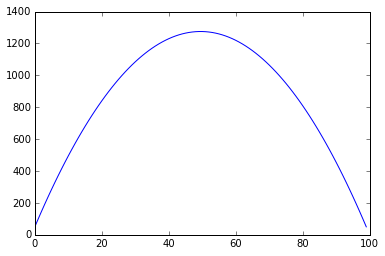

In [72]:
U = LU(b)
plot(U)